# Flood Adaptation: Minimal Model

This python script outlines a basic Agent-Based Model (ABM) developed using the Mesa framework, designed as a simplified representation of household adaptation to flood events in a social network context. The model serves as a template for understanding the fundamental mechanics of flood adapdtation with a given social network.

This directory is structured as follows:
 - A Mesa Agent class `Households` is defined in `agents.py`
 - A Mesa Agent class `Government` is defined in `agents.py` (this agent currently does not perform any action)
 - A Mesa Model class `AdaptationModel` is defined in `model.py`
 - This notebook `demo.ipynb` provides a demonstration of the model and its visualization.

Each household agent in the model represents a household with attributes and behaviors that determine its response to flood events. The flood depth attribute assigned to each household is currently random for demonstration purposes. The decision by each household to adapt is also arbitrary. In a more comprehensive model, this could be replaced with more sophisticated decision-making algorithms.

The current implementation includes several simplifications and arbitrary choices, such as random flood depths and basic adaptation logic based on random thresholds. These aspects are designed for clarity and ease of understanding and should be replaced with realistic and sound choices.

You are encouraged to modify, expand, and customize the model. This might include integrating real-world data, implementing more complex decision-making processes for agents, or exploring different network topologies and their effects on social dynamics.

The visualisation provided is basic. Additional aspects can be added for visualization and more in-depth analysis.

_This notebook was tested on 2023-11-13 with Mesa version 2.1.4 on Python 3.12.0._

# Running the model and visualizing the model domain and social network over time

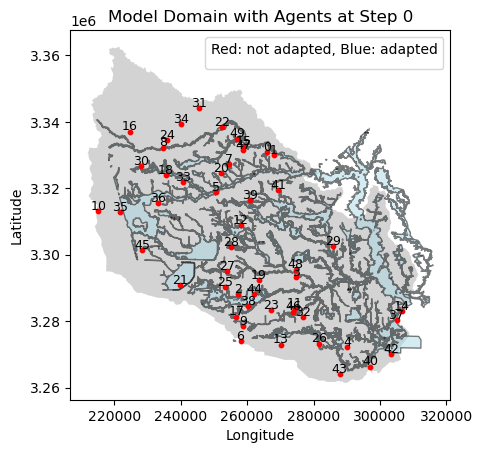

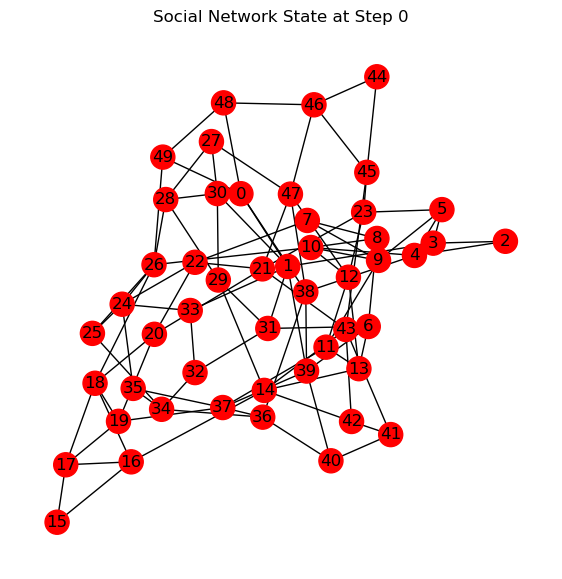

<Figure size 1000x600 with 0 Axes>

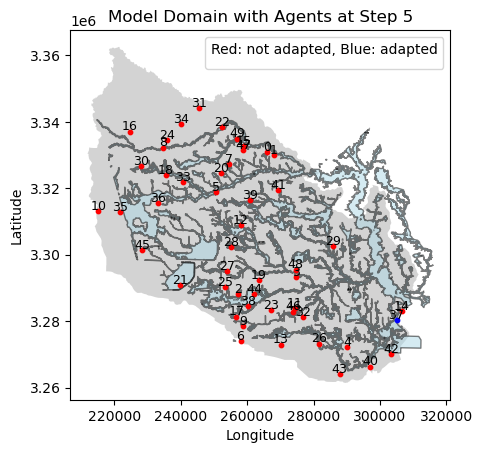

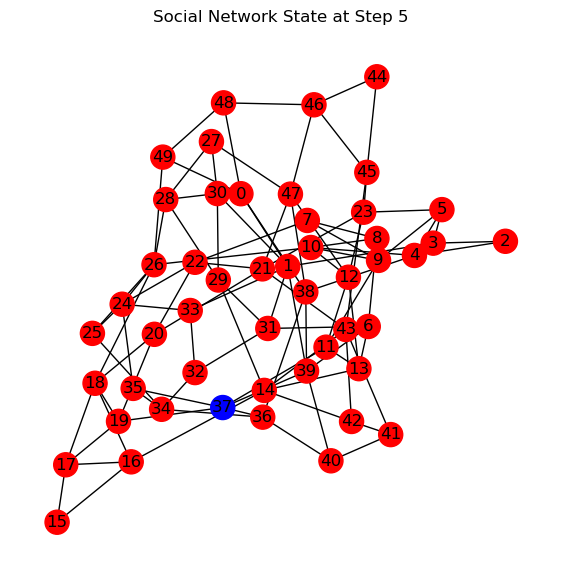

<Figure size 1000x600 with 0 Axes>

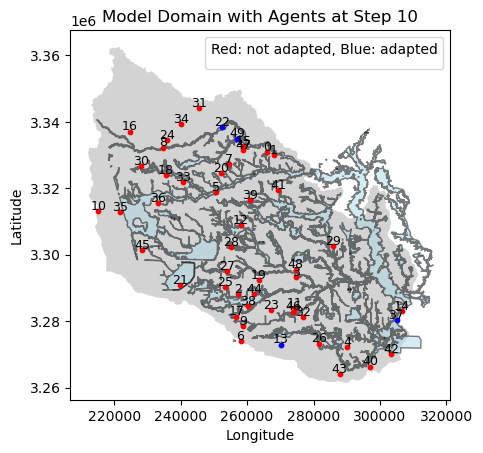

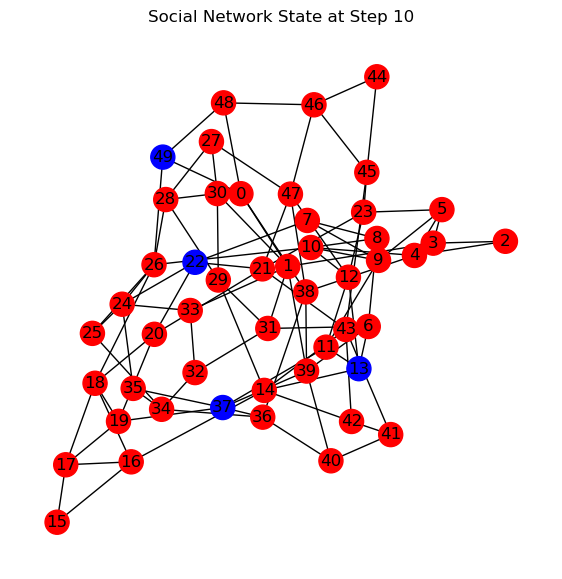

<Figure size 1000x600 with 0 Axes>

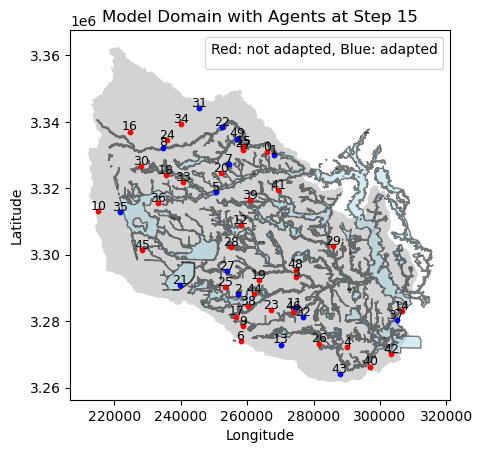

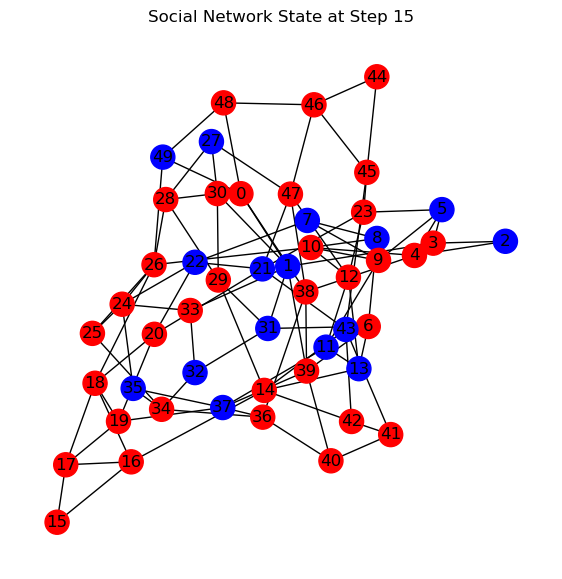

<Figure size 1000x600 with 0 Axes>

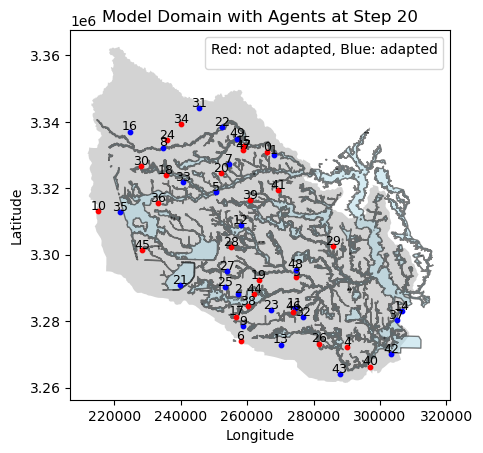

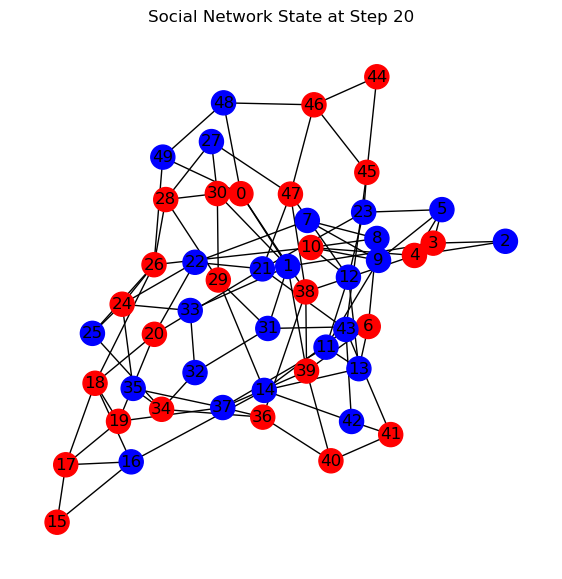

In [1]:
from model import AdaptationModel
import matplotlib.pyplot as plt
import networkx as nx

# Initialize the Adaptation Model with 50 household agents.
model = AdaptationModel(number_of_households=50, flood_map_choice="harvey", network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"

# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)

# Define a function to plot agents on the network.
# This function takes a matplotlib axes object and the model as inputs.
def plot_network(ax, model):
    # Clear the current axes.
    ax.clear()
    # Determine the color of each node (agent) based on their adaptation status.
    colors = ['blue' if agent.is_adapted else 'red' for agent in model.schedule.agents]
    # Draw the network with node colors and labels.
    nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
    # Set the title of the plot with the current step number.
    ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

# Generate the initial plots at step 0.
# Plot the spatial distribution of agents. This is a function written in the model.py
model.plot_model_domain_with_agents()

# Plot the initial state of the social network.
fig, ax = plt.subplots(figsize=(7, 7))
plot_network(ax, model)
plt.show()

# Run the model for 20 steps and generate plots every 5 steps.
for step in range(20):
    model.step()

    # Every 5 steps, generate and display plots for both the spatial distribution and network.
    # Note the first step is step 0, so the plots will be generated at steps 4, 9, 14, and 19, which are the 5th, 10th, 15th, and 20th steps.
    if (step + 1) % 5 == 0:
        # Plot for the spatial map showing agent locations and adaptation status.
        plt.figure(figsize=(10, 6))
        model.plot_model_domain_with_agents()

        # Plot for the social network showing connections and adaptation statuses.
        fig, ax = plt.subplots(figsize=(7, 7))
        plot_network(ax, model)
        plt.show()



In [2]:
agent_data = model.datacollector.get_agent_vars_dataframe()
#agent_data['Worry'].describe()
#agent_data.worry
agent_data['Age'].describe()
agent_data

FloodDepthEstimated  FloodDamageEstimated  FloodDepthActual  \
Step AgentID                                                                
0    0                   0.166580              0.335368          0.000000   
     1                   1.397434              0.706728          0.000000   
     2                   0.983715              0.645433          0.000000   
     3                   0.412143              0.493537          0.000000   
     4                   0.679646              0.580872          0.000000   
...                           ...                   ...               ...   
19   45                  0.230289              0.391914          0.271304   
     46                  0.000000              0.000000          0.000000   
     47                  0.800362              0.609418          0.803362   
     48                  4.549819              0.912834          3.512058   
     49                  1.868973              0.757493          1.295350   

              FloodDamageActual  IsAdapted  FriendsCount  \
Step AgentID                                               
0    0                 0.000000      False             4   
     1                 0.000000      False             6   
     2                 0.000000      False             2   
     3                 0.000000      False             4   
     4                 0.000000      False             5   
...                         ...        ...           ...   
19   45                0.420532      False             4   
     46                0.000000      False             4   
     47                0.610071      False             5   
     48                0.173527       True             3   
     49                0.416090       True             3   

                                                   location     Worry  \
Step AgentID                                                            
0    0          POINT (265925.3183436048 3330985.003370409)  0.163540   
     1        POINT (268008.72532402584 3329986.2355989483)  0.340956   
     2        POINT (257384.94997849432 3288050.0266777016)  0.388183   
     3         POINT (274842.41669623274 3293398.743927959)  0.000000   
     4         POINT (290183.8188034455 3272187.5380996643)  0.101656   
...                                                     ...       ...   
19   45       POINT (228381.93684585596 3301495.3247491666)  0.813483   
     46        POINT (273844.1754138322 3282878.3946172893)  0.792611   
     47          POINT (258901.1616131494 3331593.60631445)  0.697508   
     48        POINT (274606.9183694004 3295570.7148797303)  0.130000   
     49       POINT (256993.89598828618 3334991.2972518792)  0.480000   

              Self_Adaption  Self_Investment  Avg_Invest Neighbours  \
Step AgentID                                                          
0    0                    0              0.0           0         []   
     1                    0              0.0           0         []   
     2                    0              0.0           0         []   
     3                    0              0.0           0         []   
     4                    0              0.0           0         []   
...                     ...              ...         ...        ...   
19   45                   0              0.0           0         []   
     46                   0              0.0           0         []   
     47                   0              0.0           0         []   
     48                   1              0.8           0         []   
     49                   3              0.4           0         []   

                    Income        Age     Costs   W2P  
Step AgentID                                           
0    0        17183.538399  28.946785  1.000000  None  
     1        55274.079165  25.955447  1.000000  None  
     2        51010.467907  40.812886  1.000000  None  
     3        83101.651114  35.482822  1.000000  None  
     4        55547.4

In [24]:
import numpy as np

In [27]:
steps = np.arange(0,20)

Text(0.5, 1.0, 'Costs over Time')

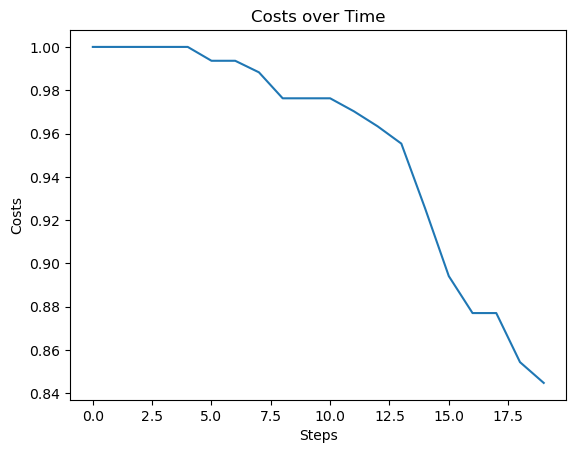

In [46]:
plt.plot(steps, agent_data.groupby(by='Step')['Costs'].mean(), label = 'Costs')
plt.ylabel('Costs')
plt.xlabel('Steps')
plt.title('Costs over Time')

Text(0.5, 1.0, 'Worry over Time')

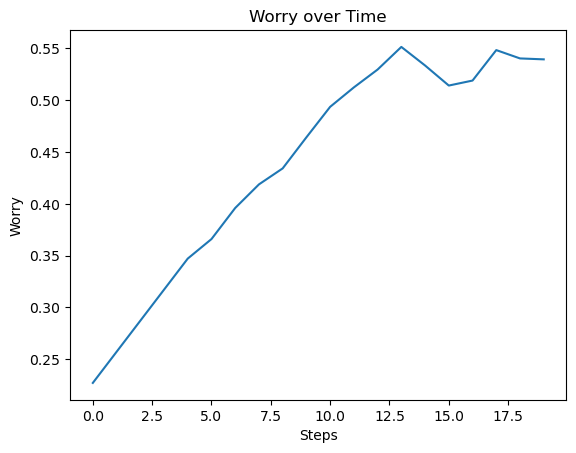

In [44]:
plt.plot(steps, agent_data.groupby(by='Step')['Worry'].mean(), label='Worry')
plt.ylabel('Worry')
plt.xlabel('Steps')
plt.title('Worry over Time')

Text(0.5, 1.0, 'Flood Damage over Time')

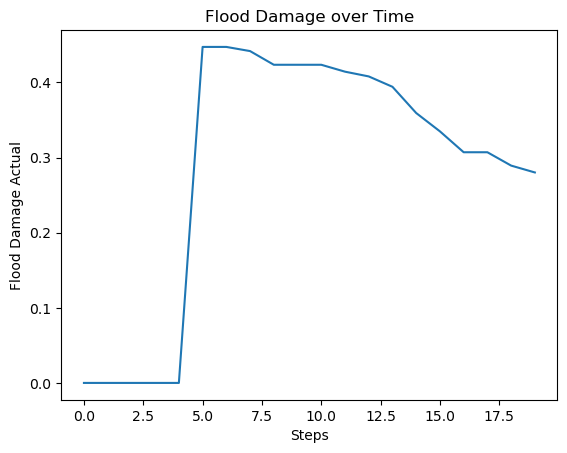

In [45]:
plt.plot(steps, agent_data.groupby(by='Step')['FloodDamageActual'].mean())
plt.ylabel('Flood Damage Actual')
plt.xlabel('Steps')
plt.title('Flood Damage over Time')

Text(0.5, 1.0, 'Flood measurement active (Step10)')

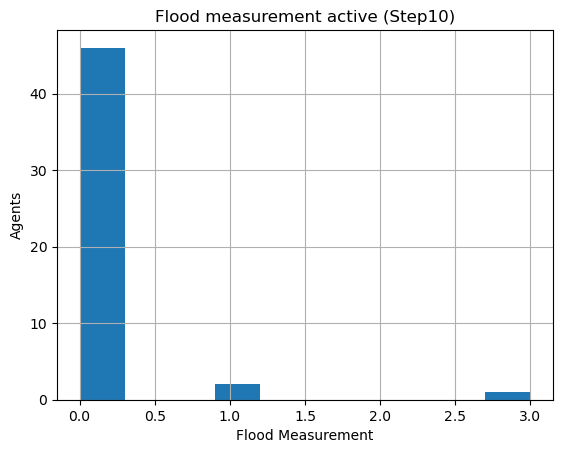

In [48]:
agent_data.iloc[-500:-451]['Self_Adaption'].hist()
plt.ylabel('Agents')
plt.xlabel('Flood Measurement')
plt.title('Flood measurement active (Step10)')

<Axes: xlabel='Step'>

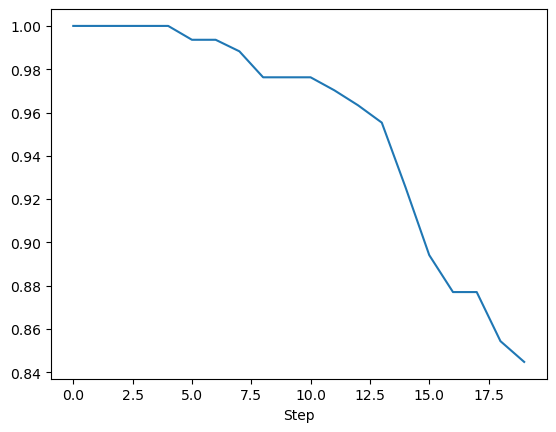

In [12]:
agent_data.groupby(by='Step')['Costs'].mean().plot()

In [6]:
agent_data.iloc[-50:-1]

FloodDepthEstimated  FloodDamageEstimated  FloodDepthActual  \
Step AgentID                                                                
19   0                   0.166580              0.335368          0.179906   
     1                   1.397434              0.706728          0.761498   
     2                   0.983715              0.645433          0.709501   
     3                   0.412143              0.493537          0.451775   
     4                   0.679646              0.580872          0.397044   
     5                   3.205029              0.851660          1.963619   
     6                   0.000000              0.000000          0.000000   
     7                   0.355423              0.467686          0.228903   
     8                   5.641396              0.950381          3.428101   
     9                   0.185238              0.353904          0.188699   
     10                  0.000000              0.000000          0.000000   
     11                  0.647145              0.572317          0.446450   
     12                  0.235474              0.395801          0.282440   
     13                  0.710386              0.588596          0.369096   
     14                  3.221699              0.852566          3.563404   
     15                  0.000000              0.000000          0.000000   
     16                  0.000000              0.000000          0.000000   
     17                  0.606174              0.560897          0.383360   
     18                  0.397152              0.487068          0.470935   
     19                  0.790287              0.607206          0.769820   
     20                  0.366112              0.472859          0.426272   
     21                  1.578238              0.727972          1.665266   
     22                  8.216503              1.000000          4.248724   
     23                  0.000000              0.000000          0.000000   
     24                  0.000000              0.000000          0.000000   
     25                  1.171804              0.675982          0.891084   
     26                  0.000000              0.000000          0.000000   
     27                  0.817671              0.613154          0.956969   
     28                  0.000000              0.000000          0.000000   
     29                  0.000000              0.000000          0.000000   
     30                  0.287647              0.430745          0.253633   
     31                  0.325932              0.452562          0.252027   
     32                  2.399665              0.801132          2.451121   
     33                  1.465534              0.715036          0.839767   
     34                  0.000000              0.000000          0.000000   
     35                  2.481255              0.806970          2.703980   
     36                  1.264931              0.689334          0.859507   
     37                  2.047550              0.773426          1.426220   
     38                  1.539669              0.723652          1.792697   
     39                  0.189024              0.357437          0.100393   
     40                  0.470489              0.516654          0.540811   
     41                  0.000000              0.000000          0.000000   
     42                  1.356622              0.701553          0.973013   
     43                  0.239301              0.398616          0.135541   
     44                  1.266150              0.689502          1.350238   
     45                  0.230289              0.391914          0.271304   
     46                  0.000000              0.000000          0.000000   
     47                  0.800362              0.609418          0.803362   
     48                  4.549819              0.912834          3.512058   

              FloodDamageActual  IsAdapted  FriendsCount  \
Step AgentID              

<Axes: >

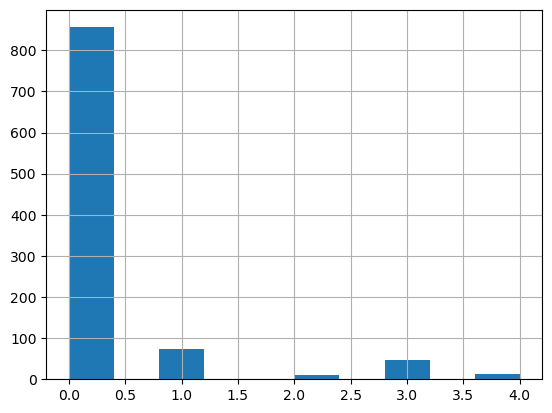

In [7]:
#last round Adaptation measurements: (step19)
agent_data['Self_Adaption'].hist()
#worry needs to have higher impact 

In [8]:
agent_data['FriendsCount']

Step  AgentID
0     0          4
      1          6
      2          2
      3          4
      4          5
                ..
19    45         4
      46         4
      47         5
      48         3
      49         3
Name: FriendsCount, Length: 1000, dtype: int64

<Axes: xlabel='Step'>

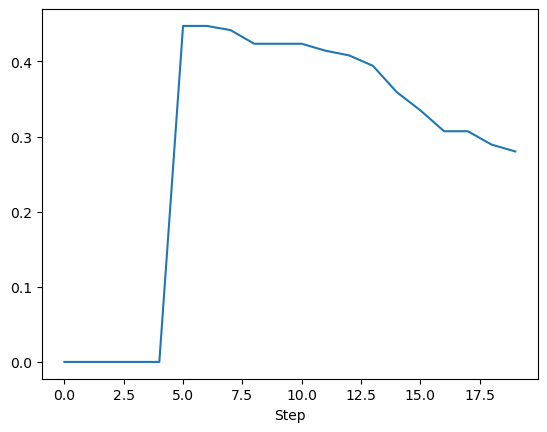

In [9]:
agent_data.groupby(by='Step')['FloodDamageActual'].mean().plot()
#agent_data.groupby(by='Step')['A].mean().plot()

<Axes: xlabel='Step'>

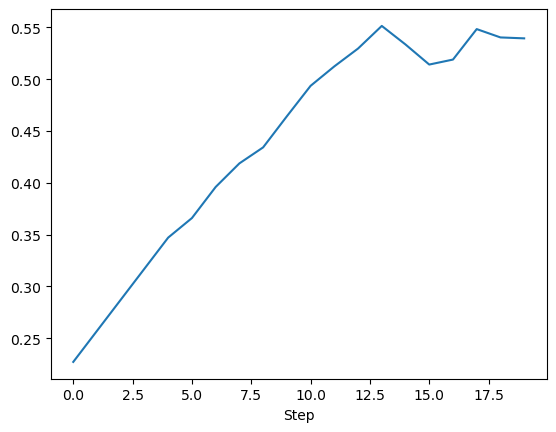

In [10]:
agent_data.groupby(by='Step')['Worry'].mean().plot()

In [11]:
agent_data.groupby(by='Step')['Self_Investment'].mean()
agent_data.

SyntaxError: invalid syntax (2309412609.py, line 2)

In [ ]:
agent_data.iloc[-100:-51]['FloodDamageActual'].mean()

0.004834292863336386

In [ ]:
agent_data.iloc[-500:-451]['FloodDamageActual'].mean()

0.03889760421828706

In [ ]:
agent_data.iloc[-600:-551]['FloodDamageActual'].mean()

0.07731505800659685

In [ ]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data
#change

,total_adapted_households
0,0
1,8
2,11
3,14
4,18
5,23
6,27
7,31
8,33
9,35
